In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches  # needed for waffle Charts
from PIL import Image  # converting images into arrays
import seaborn as sns

In [2]:
!pip install wordcloud

In [3]:
import wordcloud

In [4]:
df_can = pd.read_csv(r"F:\Data_Science_Jupyter_Files\Canada.csv")

In [5]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [6]:
# print the dimensions of the dataframe
df_can.shape

(195, 39)

In [7]:
#set Country as index
df_can.set_index("Country", inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [8]:
# Waffle Charts 

In [9]:
# let's create a new dataframe for Denmark, Norway, and Sweden.
df_dns = df_can.loc[["Denmark", "Norway", "Sweden"], :]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [10]:
# Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

# Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.
total_values = df_dns["Total"].sum()
category_proportions = df_dns["Total"]/total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [11]:
# Step 2. The second step is defining the overall size of the waffle chart.
width = 40  # width of chart
height = 10  # height of chart
total_num_tiles = width*height
print(f"Total number of tiles is {total_num_tiles}.")

Total number of tiles is 400.


In [12]:
# Step 3. The third step is using the proportion of each category to determe it respective number of tiles
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)
# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [13]:
# Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

In [14]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

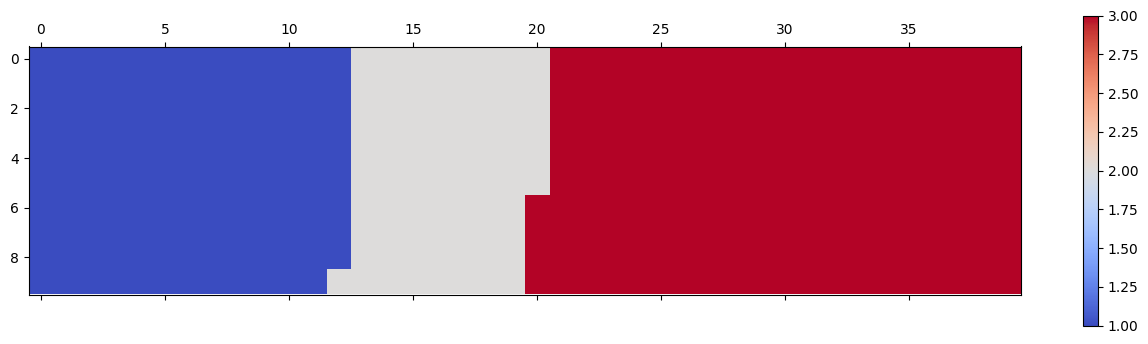

In [15]:
# Step 5. Map the waffle chart matrix into a visual.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

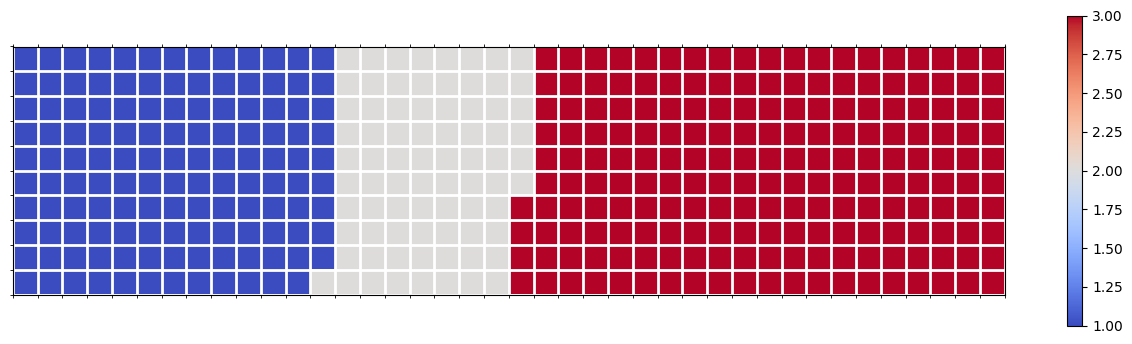

In [16]:
# Step 6. Prettify the chart.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11448\2431664607.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\HP\AppData\Local\Temp\ipykernel_11448\2431664607.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
C:\Users\HP\AppData\Local\Temp\ipykernel_11448\2431664607.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

<Figure size 640x480 with 0 Axes>

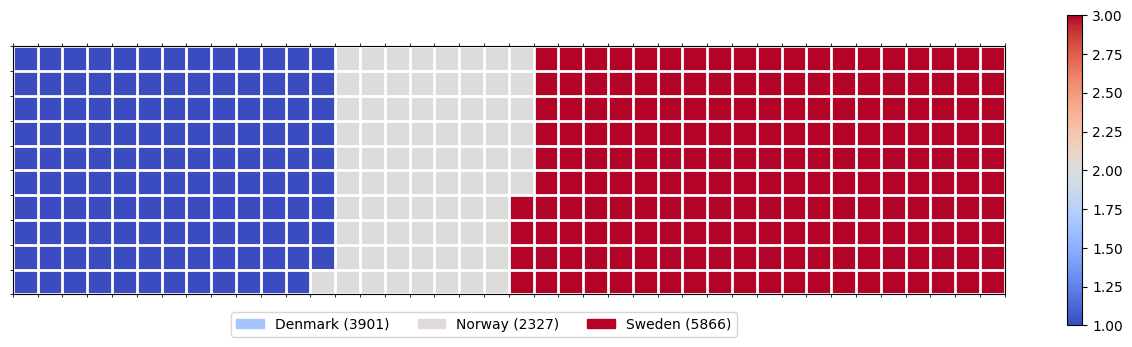

In [21]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which="minor", color="w", linestyle="-", linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

## Let's create the same waffle chart with pywaffle now

In [22]:
!pip install pywaffle

   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.6 MB 4.6 MB/s eta 0:00:06
   -- ------------------------------------- 1.8/25.6 MB 4.8 MB/s eta 0:00:05
   ---- ----------------------------------- 2.9/25.6 MB 4.7 MB/s eta 0:00:05
   ------ --------------------------------- 3.9/25.6 MB 4.7 MB/s eta 0:00:05
   ------- -------------------------------- 5.0/25.6 MB 4.6 MB/s eta 0:00:05
   --------- ------------------------------ 6.3/25.6 MB 4.7 MB/s eta 0:00:05
   ----------- ---------------------------- 7.3/25.6 MB 4.7 MB/s eta 0:00:04
   ------------- -------------------------- 8.4/25.6 MB 4.8 MB/s eta 0:00:04
   -------------- ------------------------- 9.4/25.6 MB 4.7 MB/s eta 0:00:04
   --------------- ------------------------ 10.2/25.6 MB 4.7 MB/s eta 0:00:04
   ----------------- ---------------------- 11.3/25.6 MB 4.6 MB/s eta 0:00:04
   ------------------- -------------------- 12.3/25.6 MB 4.6 MB/s eta 0:00:03
   

In [23]:
from pywaffle import Waffle

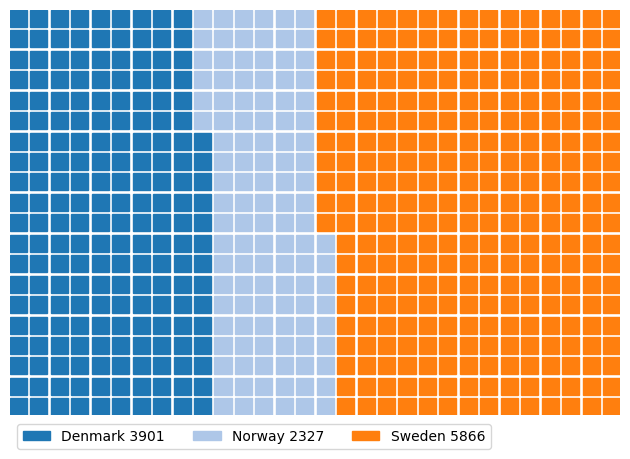

In [28]:
#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                rows = 20, columns = 30,  #pass the number of rows and columns for the waffle 
                values = df_dns["Total"],  #pass the data to be used for display
                cmap_name = "tab20",  #color scheme
                legend = {"labels": [f"{k} {(v)}" for k, v in zip(df_dns.index.values, df_dns["Total"])],
                         "loc": "lower left", "bbox_to_anchor":(0, -0.1), "ncol":3}
                )
plt.show()

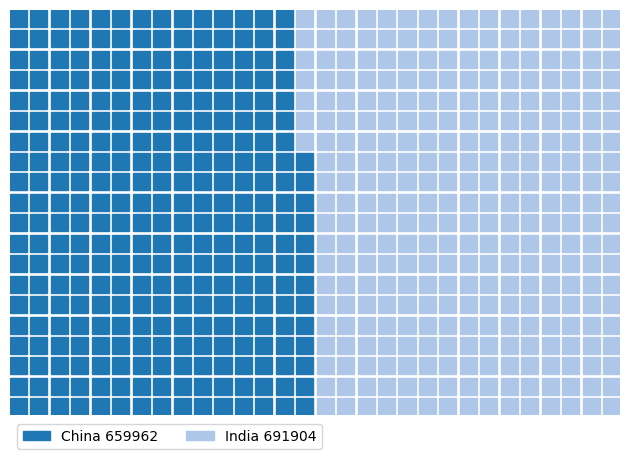

In [29]:
# Question: Create a Waffle chart to dispaly the proportiona of China and Inida total immigrant contribution.

df_CI = df_can.loc[["China", "India"], :]

fig = plt.figure(FigureClass = Waffle,
                rows = 20, columns = 30,
                values = df_CI["Total"],
                cmap_name = "tab20",
                legend = {"labels": [f"{k} {(v)}" for k, v in zip(df_CI.index.values, df_CI["Total"])],
                         "loc":"lower left", "bbox_to_anchor":(0,-0.1), "ncol":3}
                )
plt.show()

## Word Clouds

In [30]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
with open(r"F:\Data_Science_Jupyter_Files\alice_novel.txt", "r") as file:
    alice_novel = file.read()

In [54]:
stopwords = set(STOPWORDS)

In [41]:
# instantiate a word cloud object
alice_wc = WordCloud()

In [42]:
# generate the word cloud
alice_wc.generate(alice_novel)

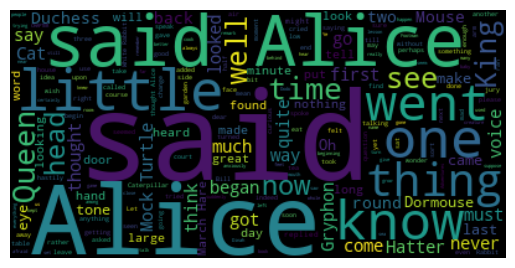

In [44]:
# display the word cloud
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

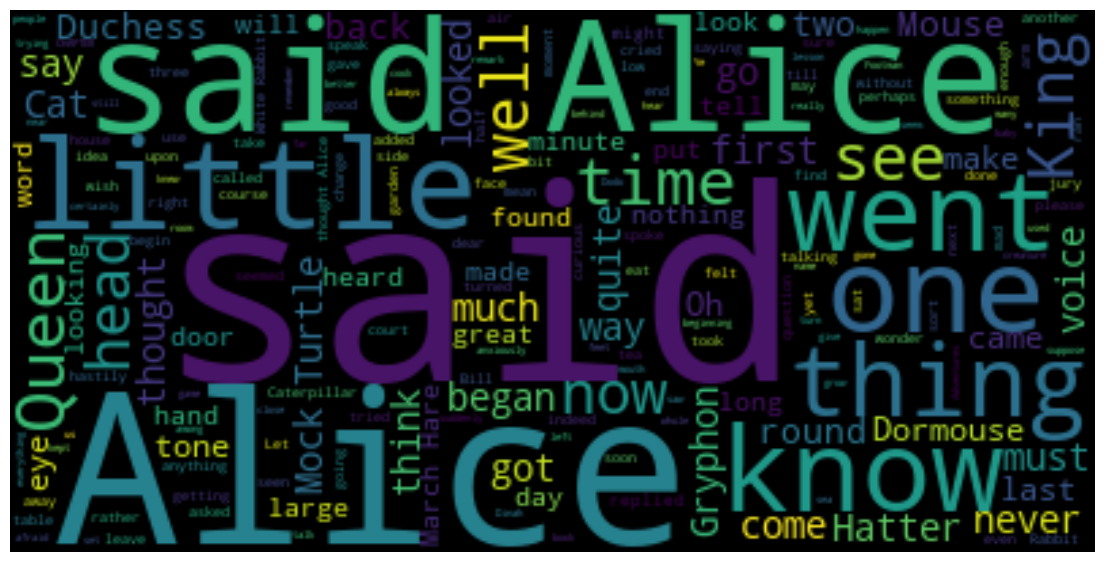

In [47]:
# Let's resize the cloud so that we can see the less frequent words a little better.

fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
# However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.
stopwords.add("said")  # add the words said to stopwords

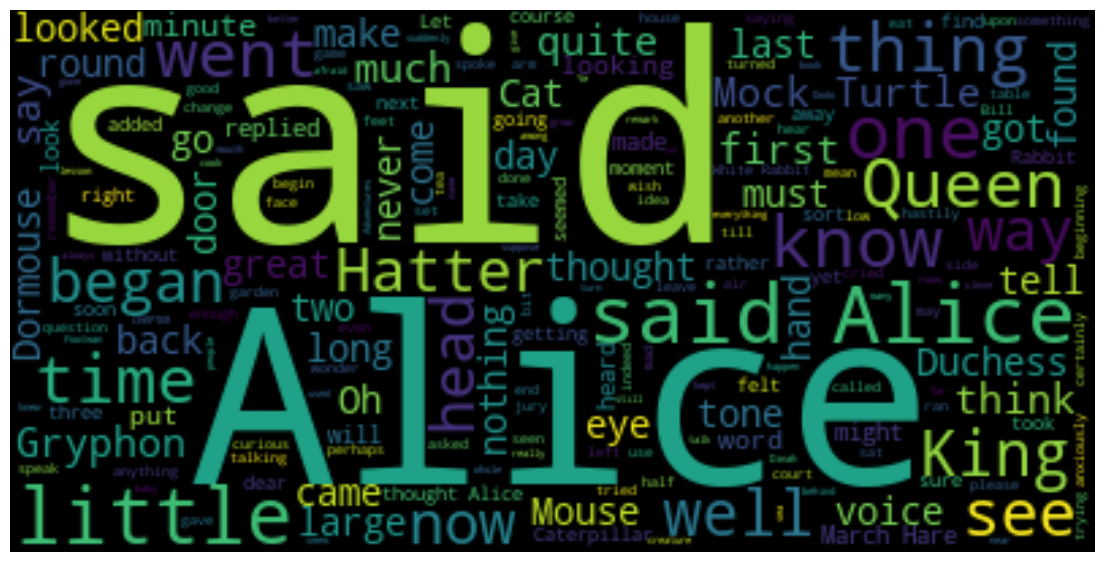

In [57]:
# re-generate the word cloud
alice_wc.generate(alice_novel)
# display the cloud
fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
# superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit.
import matplotlib.image as mpimg

In [59]:
alice_mask = mpimg.imread(r"F:\Data_Science_Jupyter_Files\alice_mask.png")

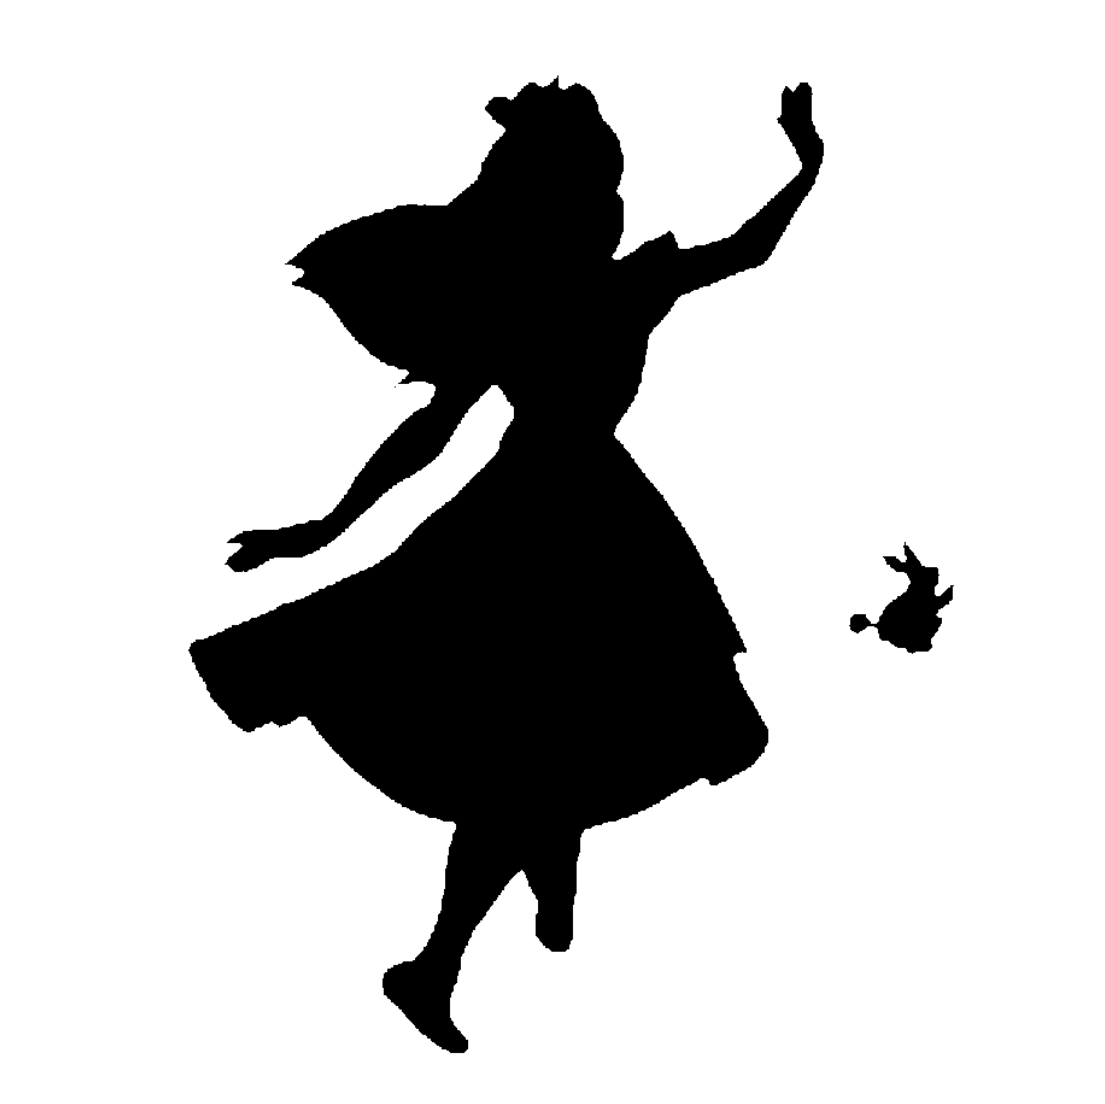

In [60]:
fig = plt.figure(figsize=(14,18))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

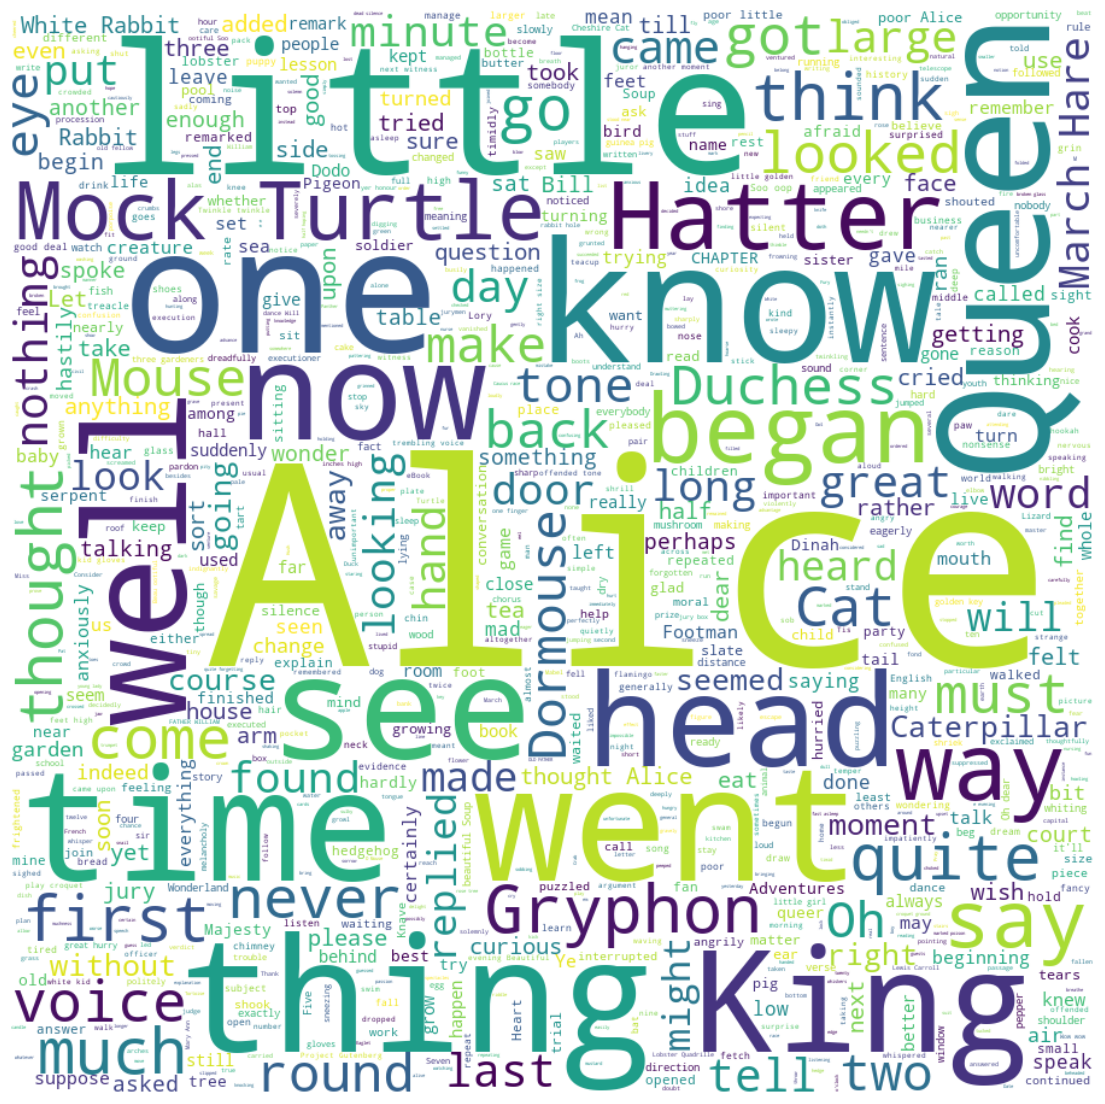

In [64]:
# Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Plotting with Seaborn 

In [68]:
df_can["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

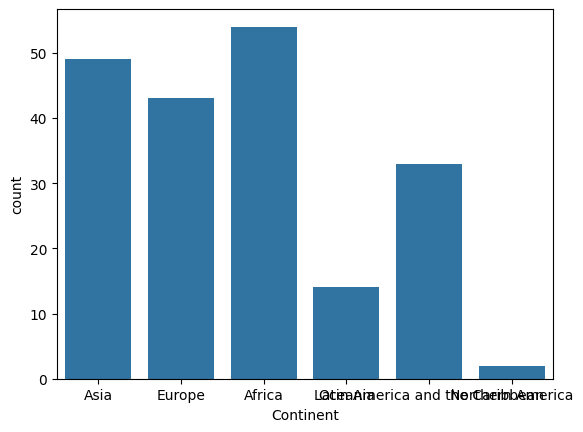

In [69]:
# countplot

sns.countplot(x="Continent", data=df_can)

In [76]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

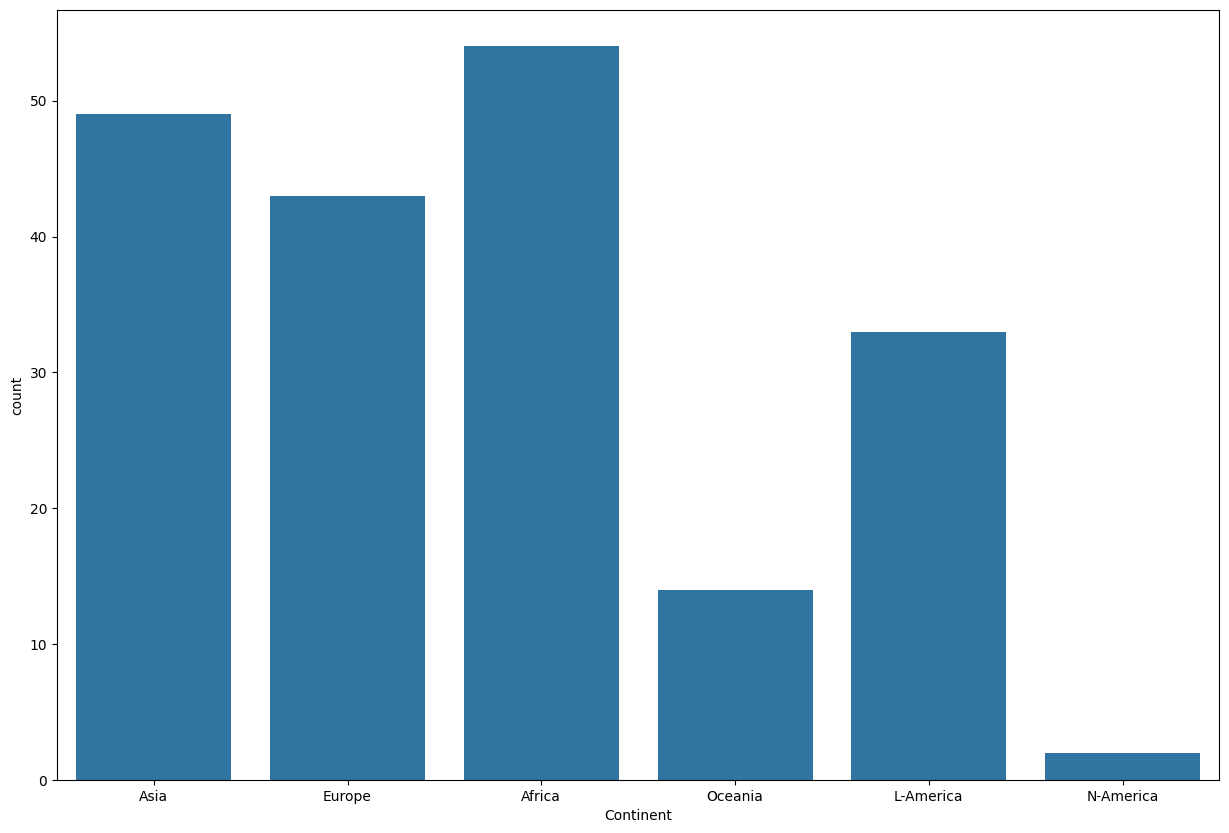

In [77]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

In [78]:
# Barplot

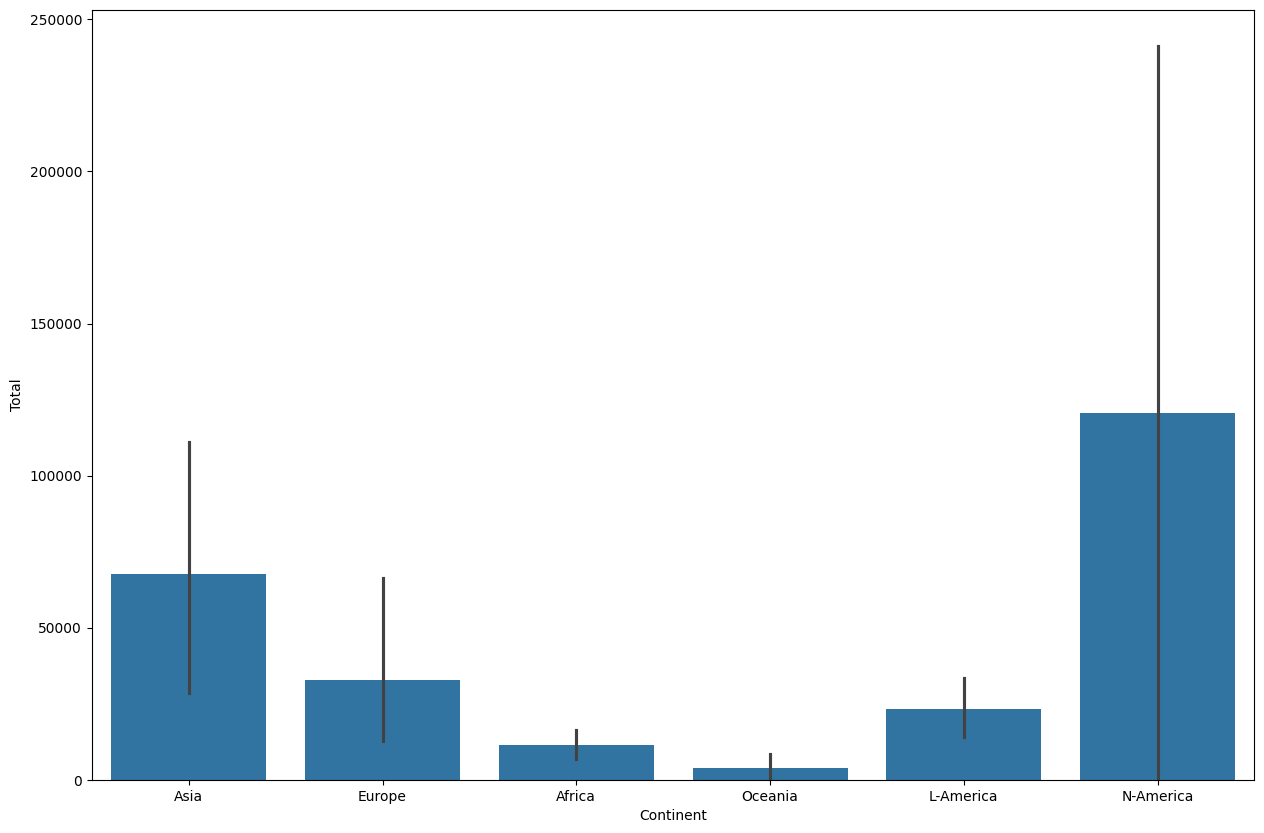

In [80]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Continent", y="Total", data=df_can1)
plt.show()

In [82]:
df_can2 = df_can.groupby("Continent")["Total"].mean()
df_can2

Continent
Africa                              11462.000000
Asia                                67710.081633
Europe                              32812.720930
Latin America and the Caribbean     23186.303030
Northern America                   120571.000000
Oceania                              3941.000000
Name: Total, dtype: float64

In [83]:
# Regression Plot 

In [85]:
years = list(map(str, range(1980, 2014)))

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ["year", "total"]

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

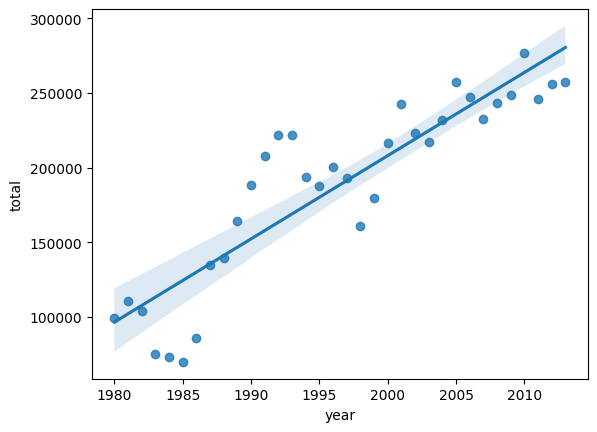

In [89]:
sns.regplot(x="year", y="total", data=df_tot)

<Axes: xlabel='year', ylabel='total'>

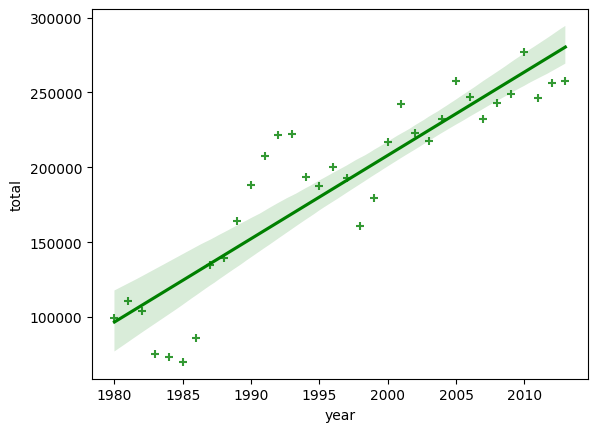

In [88]:
sns.regplot(x="year", y="total", data=df_tot, color="green", marker="+")

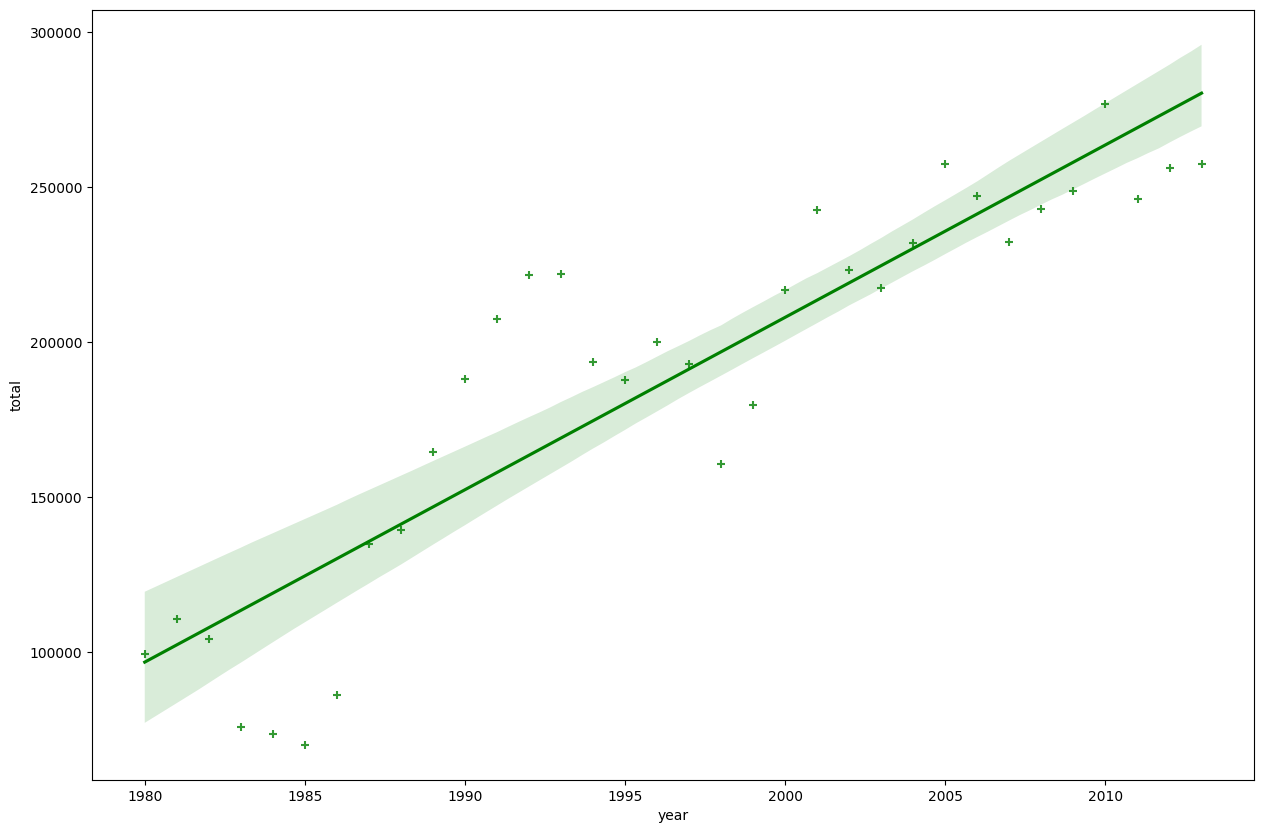

In [90]:
# Let's blow up the plot a little so that it is more appealing to the sight.
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

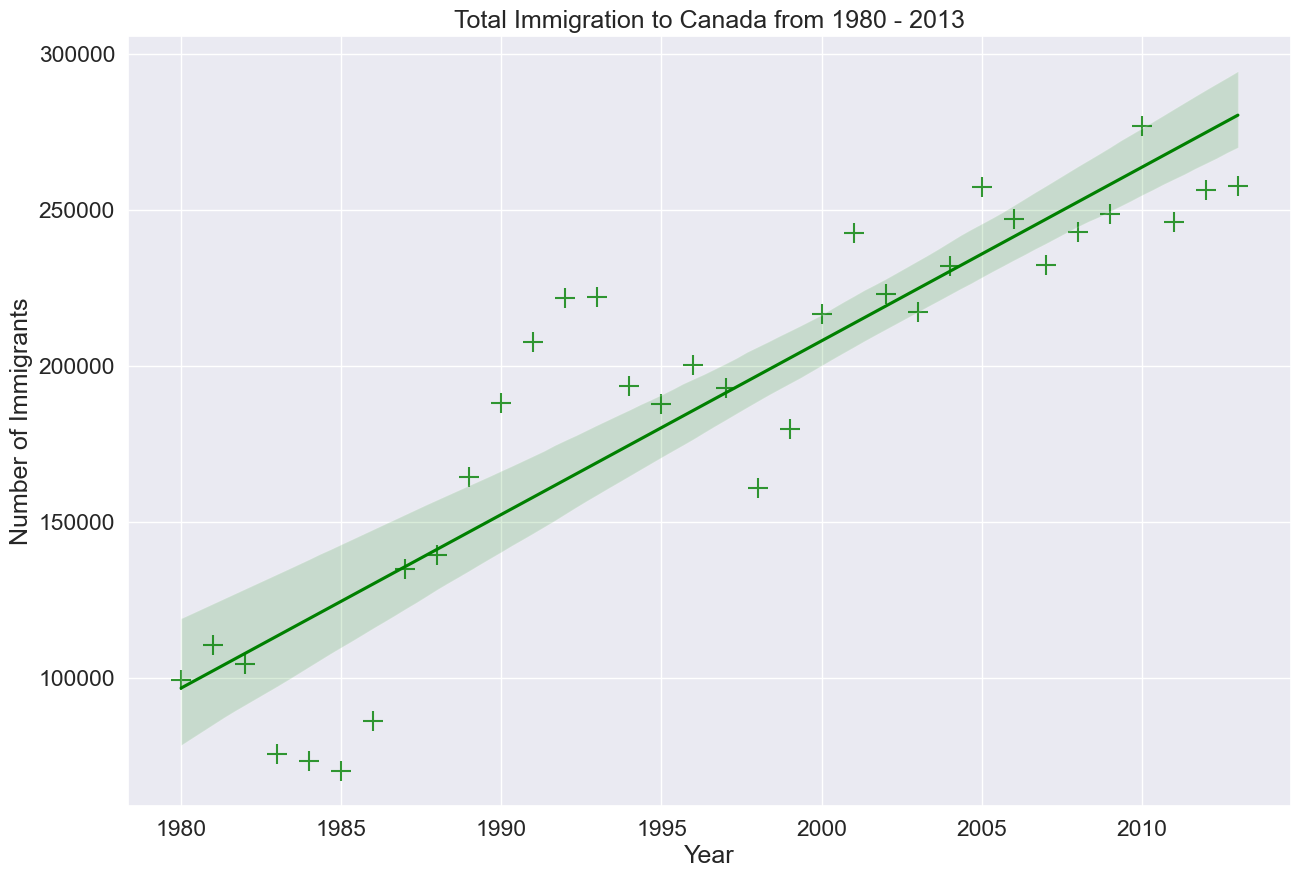

In [91]:
# And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={"s": 200})
ax.set_title("Total Immigration to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Immigrants")
plt.show()

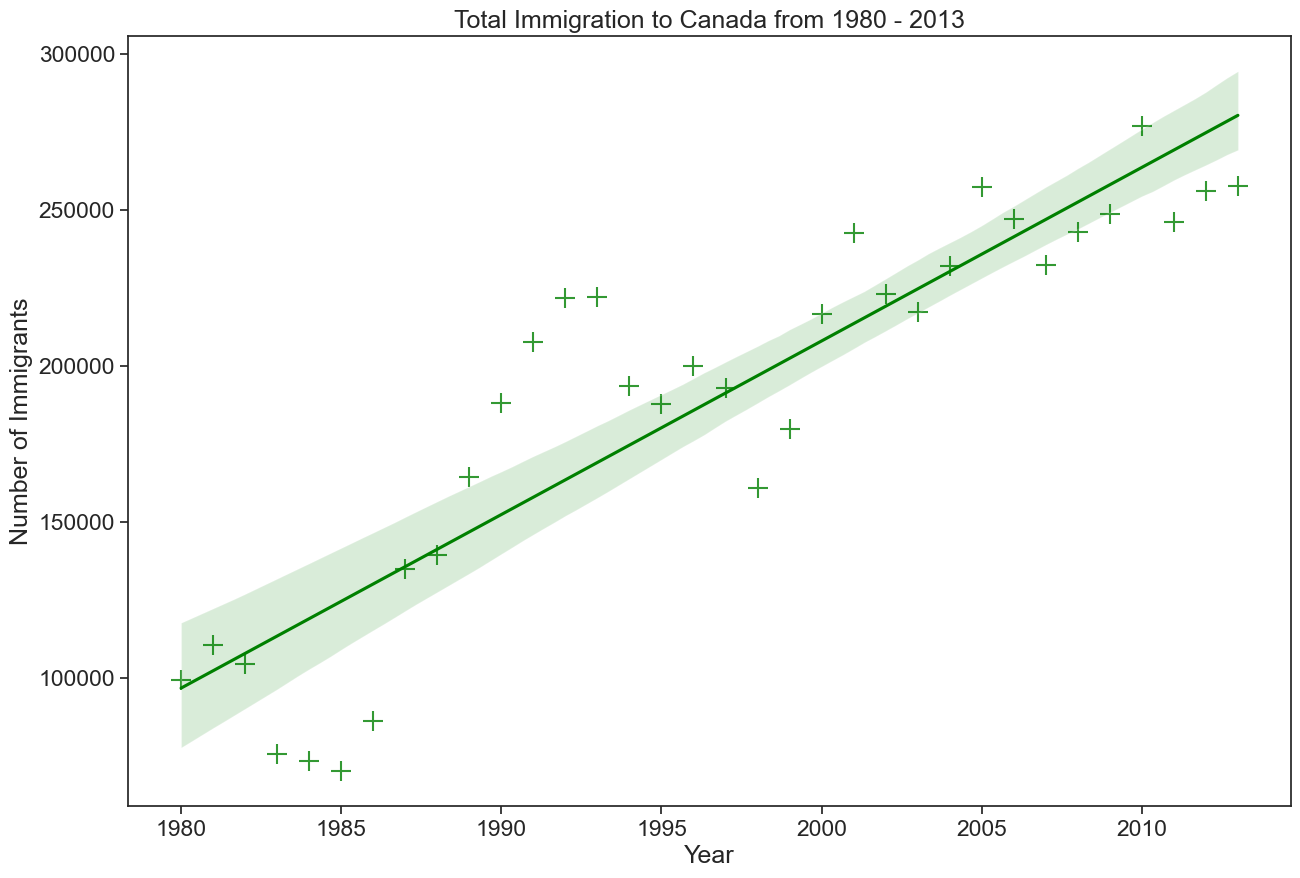

In [92]:
# If you are not a big fan of the purple background, you can easily change the style to a white plain background.
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style("ticks")  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={"s": 200})
ax.set_title("Total Immigration to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Immigrants")
plt.show()

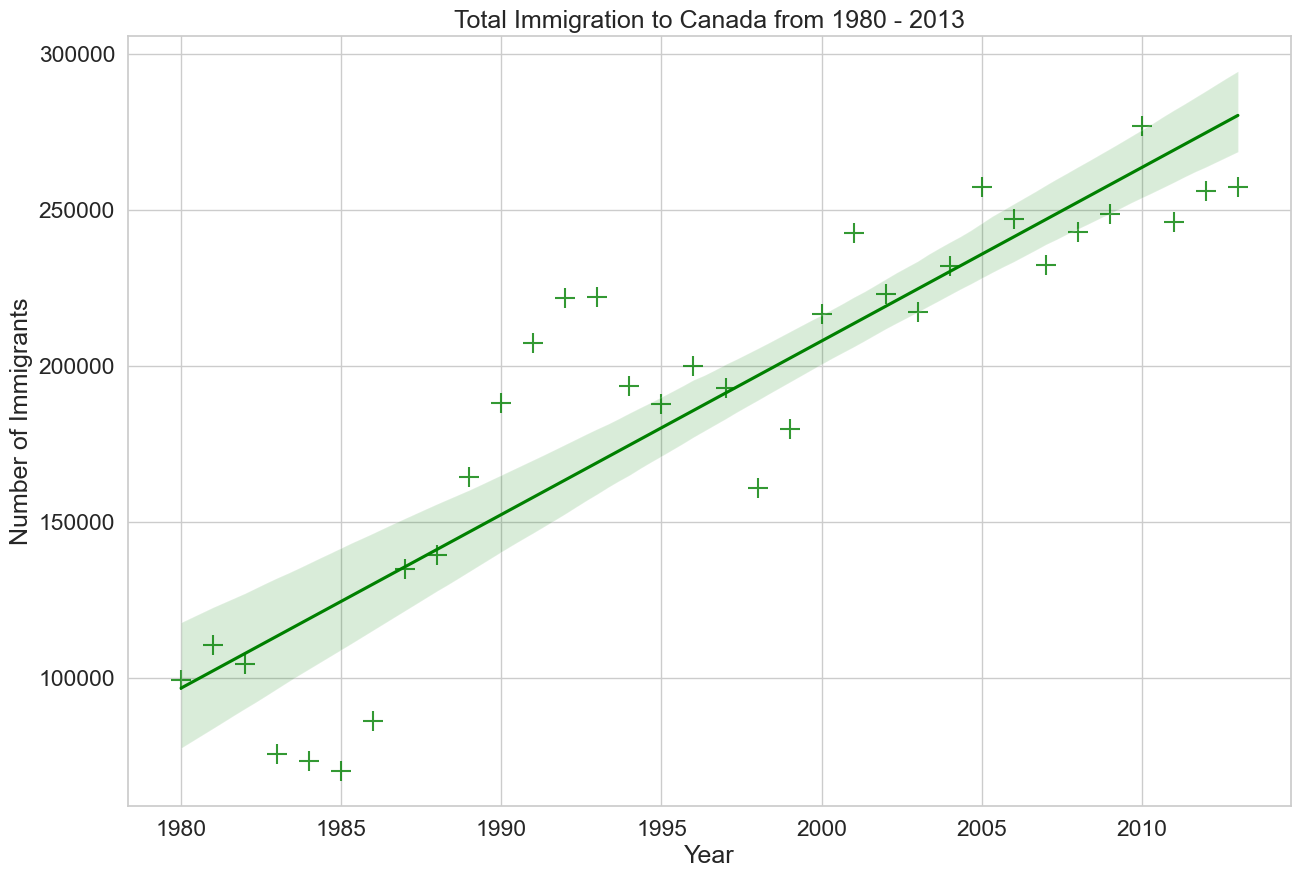

In [93]:
# a white background with gridlines.

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style("whitegrid")  

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={"s": 200})
ax.set_title("Total Immigration to Canada from 1980 - 2013")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Immigrants")
plt.show()

<Axes: xlabel='year', ylabel='total'>

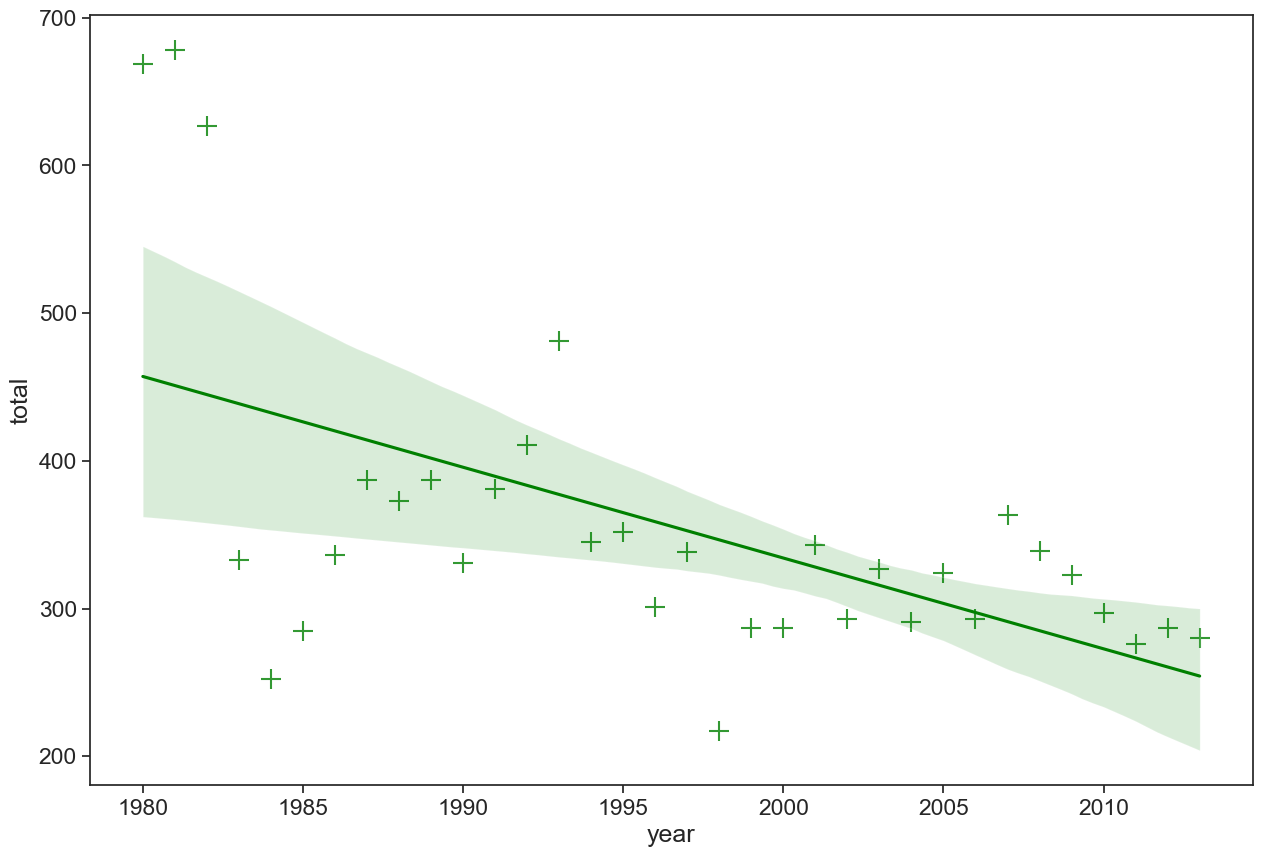

In [98]:
df_dsn = df_can.loc[["Denmark", "Sweden", "Norway"], years]
df_tot1 = pd.DataFrame(df_dsn.sum(axis=0))
df_tot1.index = map(float, df_tot1.index)
df_tot1.reset_index(inplace=True)
df_tot1.columns = ["year", "total"]

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style("ticks")
sns.regplot(x="year", y="total", data=df_tot1, color="green", marker="+", scatter_kws={"s":200})